# KSA: Polar Observations and Modelling

# Week 6 - Satellite observations

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 25%;">
    <img src="images/satellite_altimetry.jpg" width="100%"/>
</div>

Until now we have worked with different types of in-situ observations. Remote sensing using satellites represented another major revolution to our observing system, and it is another extremely valuable type of observation used in oceanography: as with Argo floats, we also talk about a "pre-satellite" and a "post-satellite" era. There have been many satellite missions, which launched different satellites equipped with different sensors with specific observational targets. This means that we can obtain a lot of different observations from satellites, such as:
- Sea surface height
- Sea surface temperatures
- Sea ice
- Ocean topography
- Ocean colour, which is used to infer surface chlorophyll
- Surface winds
- And more

There are caveats to all of the observations above, and as they are all limited to some extent. For example, depending on the frequency used by the sensors, the information may not be reliable near coastlines, or might be obstructed by clouds. The translation from what the satellite is measuring to the variable we are interested in is very complicated and a whole area of research by itself.  

## Satellite altimetry

In this class we will use satellite observations of dynamic topography from [satellite altimetry](https://www.cmar.csiro.au/sealevel/sl_meas_sat_alt.html). These satellites essentially measure the distance between themselves and the surface, and this information then gets processed to obtain the a dynamic topography, which is sea surface height referenced to the geoid. Let's dig into this a bit more.

The dynamic topography of the ocean is the shape the surface takes which both influences and is influenced by the ocean circulation. Dynamic topography is a quantity that requires a reference level based in gravity, since departures and changes with respect to a surface of equal gravity are will influence the ocean's dynamics. If the Earth was a perfect sphere, and the sea surface floor was a surface of equal gravity, we could reference our measurements to the ocean's bottom.

However, the shape of the Earth is not a perfect sphere, it is quite irregular with large variations of the gravity field across its surface. So the reference we need to use to get dynamic ocean topography is called the "geoid". Getting a good geoid estimation is also an involved task, and is where most of the uncertainties in satellite altimetry come from. 

### Satellite altimetry in polar regions

In polar regions, sea ice shields the surface of the ocean from our observing satellites. Therefore until recently, sea ice altimetry in polar regions was not a thing. However, a few years ago a new method was developed that takes advantage of the presence of "leads" in sea ice (essentially holes where the surface of the ocean is exposed). This method requires the ability to distinguish between satellite pings that are bouncing of sea ice, and pings that are finding those holes. In this class we will work with one of the latest products that uses this method.

## Satellite altimetry and surface ocean circulation

Why do we care about measuring the height of the surface of the ocean? Essentially, because it is intimately related to the ocean velocities at the ocean's surface. If we are looking at a big enough spatial scale, in timescales longer than several days, the surface of the ocean is in what we call "geostrophic" balance at a leading order.

Geostrophic balance refers to the balance between pressure forces and the Earth's rotation. We won't go into the maths (yet), but it all comes down to the following:

<p style="margin-right: 20%; margin-left: 20%; text-align: center;"> <strong>At the ocean's surface, in geostrophic balance, currents will be flow parallel to contours of equal sea level, leaving higher sea surface heights to the left in the Southern Hemisphere, and to the right in the Northern Hemisphere. The strength of the current is proportional to the tilt of the sea surface.</strong> </p>

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import gsw
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Load data

We will use a novel satellite product developed by [Auger et al. 2022](https://www.nature.com/articles/s41597-022-01166-z). Historically, satellite altimetry was not possible in regions with sea ice because the satellite can not sense the ocean's surface through the sea ice. In recent years, it has become possible to identify when the satellite has pinged through a hole in sea ice (leads), and retrieve from that sea surface height information. 

So this is one of the first products for the Southern Ocean!

In [2]:
ds = xr.open_dataset('/g/data/jk72/jn8053/KSA_Observations_Modelling/Class4/data/sla_v2_monthly_avg_regridded_bil.nc')
ds

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 108, bnds: 2, lon: 3600, lat: 400)
Coordinates:
  * time       (time) datetime64[ns] 864B 2013-01-15T12:00:00 ... 2021-12-16
  * lon        (lon) float64 29kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat        (lat) float64 3kB -81.11 -81.01 -80.91 ... -41.41 -41.31 -41.21
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2kB ...
    sla        (time, lat, lon) float32 622MB ...
    adt        (time, lat, lon) float32 622MB ...
    ugos       (time, lat, lon) float32 622MB ...
    vgos       (time, lat, lon) float32 622MB ...
    ugosa      (time, lat, lon) float32 622MB ...
    vgosa      (time, lat, lon) float32 622MB ...
Attributes: (12/45)
    CDI:                             Climate Data Interface version 2.0.5 (ht...
    Conventions:                     CF-1.7
    source:                          Altimetry measurements
    institution:                     CLS,CNES
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             2013-01-02 00:00:00Z
    title:                           DT merged all satellites Antarctic South...
    frequency:                       mon
    history:                         Tue Aug 13 13:57:22 2024: cdo remapbil s...
    CDO:                             Climate Data Operators version 2.0.5 (ht...

## Mean dynamic topography

There are two variables in the dataset, `adt` and `sla`. They are absolute dynamic topography, and sea level anomalies respectively. The absolute dynamic topography is the height above the geoid, and the sea level anomalies are the height above the mean surface. They are related via `mdt`, which is the mean dynamic topography, by the following relation:
$$
MDT = ADT - SLA
$$

Let's calculate the mean dynamic topography and plot it:

In [3]:
mdt = ds['adt']-ds['sla']

In [4]:
def stereographic_axis(ax):
    
    ax.set_extent([-180, 180, -80, -50], crs = ccrs.PlateCarree())
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='gainsboro',
                                            facecolor='gainsboro'))
    ax.coastlines(resolution = "110m")
    # Map the plot boundaries to a circle
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    return ax

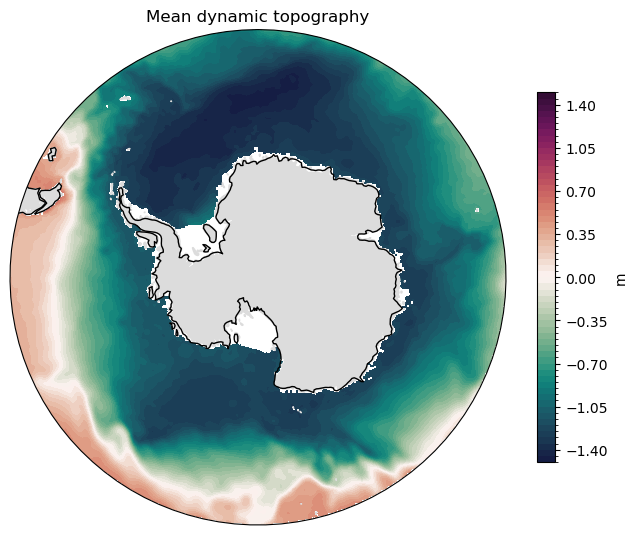

In [5]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection = ccrs.SouthPolarStereo())
ax = stereographic_axis(ax)
mdt.mean('time').plot.contourf(ax = ax, transform = ccrs.PlateCarree(),
                               levels = np.arange(-1.5, 1.55, .05), cmap = cm.cm.curl,
                               cbar_kwargs = {'label': 'm', 'shrink':.6})
plt.title('Mean dynamic topography');

There are a lot of things to unpack in this figure! Remember that **"At the ocean's surface, in geostrophic balance, currents will be flow parallel to contours of equal sea level, leaving higher sea surface heights to the left in the Southern Hemisphere, and to the right in the Northern Hemisphere.  The strength of the current is proportional to the tilt of the sea surface."** Taking into account this information, note the following:

- There is a "depression" in sea level in the Weddell Sea. This means that the surface currents in that region are circular and clockwise (flow that leaves high pressures to its left), establishing what we call an ocean gyre. This is the Weddell Gyre.
- There is a similar depression in the Ross Sea. This is the Ross Gyre. Note how the Ross Gyre center is less "deep" than the Weddell's - this means that it's surface circulation is weaker!
- A bit further north of the Antarctic margins (north of the gyres) the coloured contours are changing rapidly. This rapid change reflects the increase in sea surface tilt in this region, which is associated to fast surface currents that seem quasi-zonal in their orientation. This is the Antarctic Circumpolar Current.

Let's plot a zonal average to better visualize this:

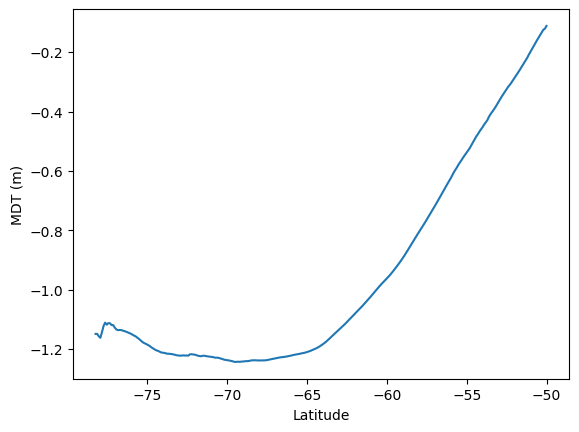

In [6]:
mdt.mean('time').mean('lon').plot()
plt.xlabel('Latitude')
plt.ylabel('MDT (m)');

#### Question 1

Identify in the zonal mean plot above the regions that correspond to the gyre circulation and the Antarctic Circumpolar Current. What is the logic behind your identification? Which region would have a stronger circulation?

*Answer here*

## Seasonal variability of absolute dynamic topography

Now that we got a good idea of what mean sea level looks like in the Southern Ocean, let's go look at how it changes throughout the seasons. This time we are going to use `adt` because `mdt` represents a time-mean dynamic topography. 

To calculate the `adt` per season, we will use `xarray.groupby('time.season')` function, which groups our data into the four seasons made by DJF (December, January, February), MAM (March, April, May), JJA (June, July August) and SON (September, October, November). After applying the grouping, we will use `.mean('time')` to calculate seasonal averages.

In [7]:
adt_per_season = ds['adt'].groupby('time.season').mean('time')
adt_per_season

<xarray.DataArray 'adt' (season: 4, lat: 400, lon: 3600)> Size: 23MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 29kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat      (lat) float64 3kB -81.11 -81.01 -80.91 ... -41.41 -41.31 -41.21
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:  sea_surface_height_above_sea_level
    long_name:      Absolute dynamic topography
    units:          m
    cell_methods:   time: mean
    comment:        The absolute dynamic topography is the sea surface height...

As you can see, now we have a `season` dimension instead of time. Let's plot this:

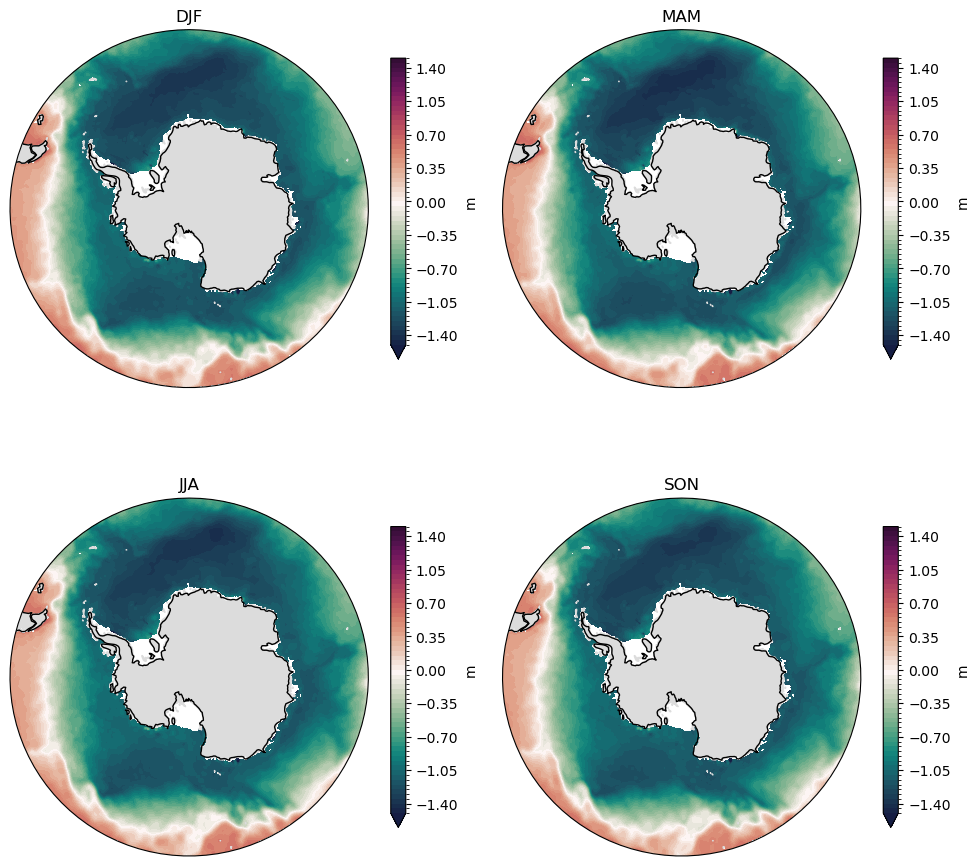

In [8]:
fig = plt.figure(figsize = (10, 10))
axs = [fig.add_subplot(221, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(222, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(223, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(224, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)
    
adt_per_season.sel(season = 'DJF').plot.contourf(ax = axs[0], transform = ccrs.PlateCarree(),
                                                 levels = np.arange(-1.5, 1.55, .05), cmap = cm.cm.curl,
                                                 cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[0].set_title('DJF');
adt_per_season.sel(season = 'MAM').plot.contourf(ax = axs[1], transform = ccrs.PlateCarree(),
                                                 levels = np.arange(-1.5, 1.55, .05), cmap = cm.cm.curl,
                                                 cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[1].set_title('MAM');
adt_per_season.sel(season = 'JJA').plot.contourf(ax = axs[2], transform = ccrs.PlateCarree(),
                                                 levels = np.arange(-1.5, 1.55, .05), cmap = cm.cm.curl,
                                                 cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[2].set_title('JJA');
adt_per_season.sel(season = 'SON').plot.contourf(ax = axs[3], transform = ccrs.PlateCarree(),
                                                 levels = np.arange(-1.5, 1.55, .05), cmap = cm.cm.curl,
                                                 cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[3].set_title('SON');
plt.tight_layout()

These are great, but it's hard to pick apart the differences in each season! A better way of visualising this is as *anomalies from the mean*, or in other words, how does a specific season differ from the time mean?

In [9]:
adt_anom_per_season = adt_per_season - ds['adt'].mean('time')

This time when plotting, we will use the `RdBu_r` colormap which is conventionally used to show anomalies!

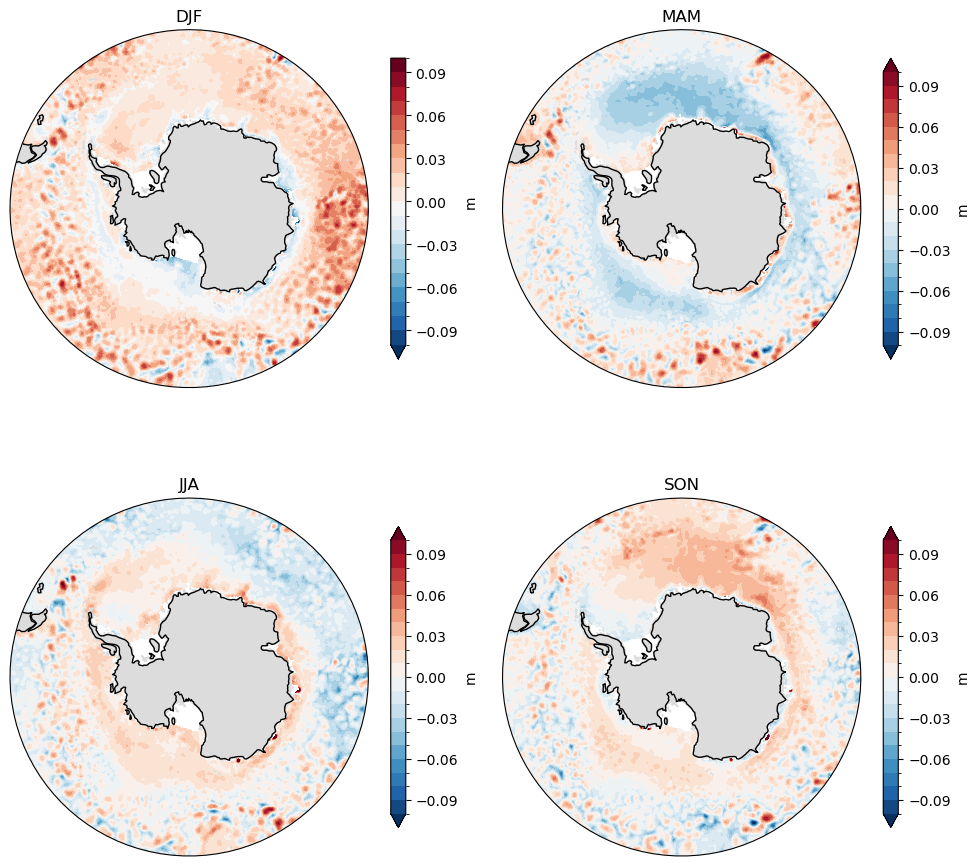

In [10]:
fig = plt.figure(figsize = (10, 10))
axs = [fig.add_subplot(221, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(222, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(223, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(224, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax = stereographic_axis(ax)
    
adt_anom_per_season.sel(season = 'DJF').plot.contourf(ax = axs[0], transform = ccrs.PlateCarree(),
                                                      levels = np.arange(-.1, .11, .01), cmap = 'RdBu_r',
                                                      cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[0].set_title('DJF');
adt_anom_per_season.sel(season = 'MAM').plot.contourf(ax = axs[1], transform = ccrs.PlateCarree(),
                                                      levels = np.arange(-.1, .11, .01), cmap = 'RdBu_r',
                                                      cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[1].set_title('MAM');
adt_anom_per_season.sel(season = 'JJA').plot.contourf(ax = axs[2], transform = ccrs.PlateCarree(),
                                                      levels = np.arange(-.1, .11, .01), cmap = 'RdBu_r',
                                                      cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[2].set_title('JJA');
adt_anom_per_season.sel(season = 'SON').plot.contourf(ax = axs[3], transform = ccrs.PlateCarree(),
                                                      levels = np.arange(-.1, .11, .01), cmap = 'RdBu_r',
                                                      cbar_kwargs = {'label': 'm', 'shrink':.6})
axs[3].set_title('SON');
plt.tight_layout()

#### Question 2

In the figure above, red colours represent regions where that season's sea level is higher than the mean, and blue regions where it is lower than the mean. Notice how around the Antarctic margins there is a sort of "see-saw" pattern to the changes: when sea level goes down close to the coast like in DJF and to a lesser extent SON, further north it goes up! 

Taking this into account, what do you think the above changes in sea level throughout the seasons impact the the surface circulation? Little help: during MAM the surface circulation around the Antarctic margins speeds up! Why? Describe other changes.

*Answer here*

## Snapshot of sea level anomalies

We have seen what the mean and the seasonal averages look like. Both of these involve averaging over large periods of time, which usually has the effect of smoothing out smaller scale variability. Let's get a sense of this by plotting a random timestep of the sea level anomalies:

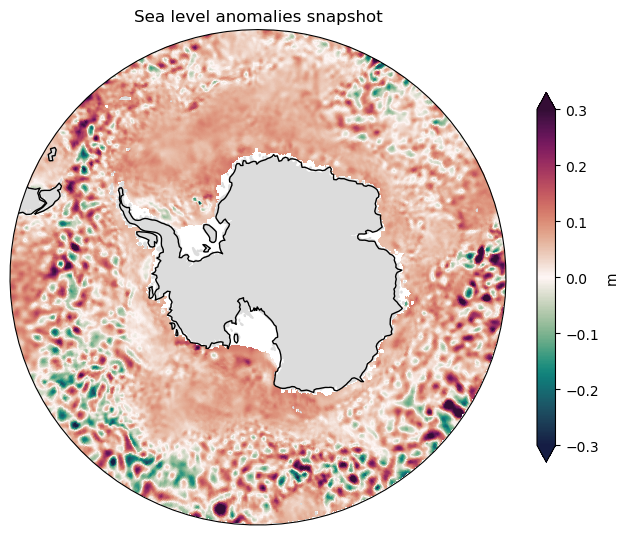

In [11]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection = ccrs.SouthPolarStereo())
ax = stereographic_axis(ax)
ds['sla'].isel(time = 0).plot(ax = ax, transform = ccrs.PlateCarree(),
                              vmin = -0.3, vmax = 0.3, cmap = cm.cm.curl,
                              cbar_kwargs = {'label': 'm', 'shrink':.6})
plt.title('Sea level anomalies snapshot');

Unlike the time mean `mdt`, with smoother contours that allowed the identification of the major features of the ocean circulation, the snapshots of sea level anomalies reveal a rich, high frequency variability. By high frequency, we mean small spatial scales and small time scales of existance. 

At the latitudes where we identified the zonally oriented contours related to the Antarctic Circumpolar Current, the `sla` reveals a pattern of small circles of alternating positive/negative anomalies. These are eddies, circular currents in the ocean that in spite of their size, have a big influence on the ocean's circulation and properties. This snapshot illustrates quite well the concept of "soup of eddies"!